In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skopt.plots import plot_convergence
from sklearn.datasets import load_boston, load_iris
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from celery_tasks.base import tuning

## Test For Regressor

In [8]:
b_x, b_y =  load_boston(return_X_y=True)
reg = GradientBoostingRegressor(n_estimators=50, random_state=0)

In [9]:
params = {
    'max_depth': (1, 5),
    'learning_rate': (1e-05, 1, 'log-uniform'),
    'max_features': (1, b_x.shape[1]),
    'min_samples_split': (2, 100),
    'min_samples_leaf': (1, 100)
}
cv = {
    'cv': 5,
    'n_jobs': -1,
    'scoring': 'neg_mean_absolute_error'
}
gp = {
    'n_calls': 10,
    'random_state': 0,
    'verbose': True
}

In [10]:
res = tuning(reg, b_x, b_y, params, cv, gp)

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 1.1105
Function value obtained: 6.3734
Current minimum: 6.3734
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.9186
Function value obtained: 5.6259
Current minimum: 5.6259
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 1.0032
Function value obtained: 3.6166
Current minimum: 3.6166
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 0.9827
Function value obtained: 7.0728
Current minimum: 3.6166
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 0.9613
Function value obtained: 5.9574
Current minimum: 3.6166
Iteration No: 6 started. Evaluating

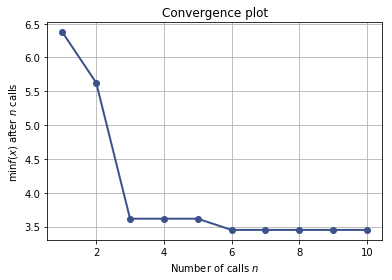

In [28]:
plot_convergence(res);

## Test For Classifier

In [ ]:
i_x, i_y =  load_iris(return_X_y=True)
i_features = i_x.shape[1]
gbc = GradientBoostingClassifier(n_estimators=50, random_state=0)

In [ ]:
params = {
    'max_depth': (1, 5),
    'learning_rate': (1e-05, 1, 'log-uniform'),
    'max_features': (1, i_features),
    'min_samples_split': (2, 100),
    'min_samples_leaf': (1, 100)
}
cv = {
    'cv': 5,
    'n_jobs': -1,
    'scoring': 'neg_mean_absolute_error'
}
gp = {
    'n_calls': 10,
    'random_state': 0,
    'verbose': True
}

In [ ]:
res_cls = tuning(gbc, i_x, i_y, params, cv, gp)

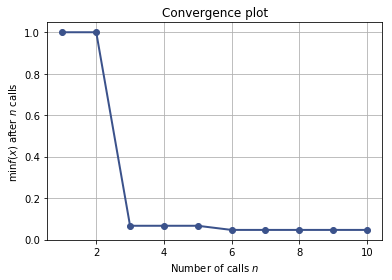

In [29]:
plot_convergence(res_cls);

## Test For XGBoost

## Test For LightGBM

## Test For Catboost

In [3]:
from catboost import CatBoostRegressor

In [4]:
b_x, b_y =  load_boston(return_X_y=True)
cbr = CatBoostRegressor(n_estimators=50, random_state=0)

In [7]:
params = {
    'depth': (1, 5),
    'learning_rate': (1e-05, 1, 'log-uniform'),
#     'max_features': (1, b_features),
#     'min_samples_split': (2, 100),
#     'min_samples_leaf': (1, 100)
}
cv = {
    'cv': 5,
    'n_jobs': -1,
    'scoring': 'neg_mean_absolute_error'
}
gp = {
    'n_calls': 10,
    'random_state': 0,
    'verbose': True
}
res_cbr = tuning(cbr, b_x, b_y, params, cv, gp)

Iteration No: 1 started. Evaluating function at random point.
Set: {'depth': 5, 'learning_rate': 0.0092092251554908942}


D:\Anaconda3\lib\site-packages\sklearn\base.py:122: DeprecationWarning: Estimator CatBoostRegressor modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\base.py:122: DeprecationWarning: Estimator CatBoostRegressor modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\base.py:122: DeprecationWarning: Estimator CatBoostRegressor modifies parameters in __init__. This behavior is deprecated as of 0.18 and support for this behavior will be removed in 0.20.
  % type(estimator).__name__, DeprecationWarning)
D:\Anaconda3\lib\site-packages\sklearn\base.py:122: DeprecationWarning: Estimator CatBoostRegressor modifies parameters in __init__. This behavior is deprecated as of 0.

JoblibCatboostError: JoblibCatboostError
___________________________________________________________________________
Multiprocessing exception:
...........................................................................
D:\Anaconda3\lib\runpy.py in _run_module_as_main(mod_name='ipykernel_launcher', alter_argv=1)
    188         sys.exit(msg)
    189     main_globals = sys.modules["__main__"].__dict__
    190     if alter_argv:
    191         sys.argv[0] = mod_spec.origin
    192     return _run_code(code, main_globals, None,
--> 193                      "__main__", mod_spec)
        mod_spec = ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py')
    194 
    195 def run_module(mod_name, init_globals=None,
    196                run_name=None, alter_sys=False):
    197     """Execute a module's code without importing it

...........................................................................
D:\Anaconda3\lib\runpy.py in _run_code(code=<code object <module> at 0x00000251199896F0, fil...lib\site-packages\ipykernel_launcher.py", line 5>, run_globals={'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'D:\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'D:\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'D:\\Anaconda3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}, init_globals=None, mod_name='__main__', mod_spec=ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), pkg_name='', script_name=None)
     80                        __cached__ = cached,
     81                        __doc__ = None,
     82                        __loader__ = loader,
     83                        __package__ = pkg_name,
     84                        __spec__ = mod_spec)
---> 85     exec(code, run_globals)
        code = <code object <module> at 0x00000251199896F0, fil...lib\site-packages\ipykernel_launcher.py", line 5>
        run_globals = {'__annotations__': {}, '__builtins__': <module 'builtins' (built-in)>, '__cached__': r'D:\Anaconda3\lib\site-packages\__pycache__\ipykernel_launcher.cpython-36.pyc', '__doc__': 'Entry point for launching an IPython kernel.\n\nTh...orts until\nafter removing the cwd from sys.path.\n', '__file__': r'D:\Anaconda3\lib\site-packages\ipykernel_launcher.py', '__loader__': <_frozen_importlib_external.SourceFileLoader object>, '__name__': '__main__', '__package__': '', '__spec__': ModuleSpec(name='ipykernel_launcher', loader=<_f...nda3\\lib\\site-packages\\ipykernel_launcher.py'), 'app': <module 'ipykernel.kernelapp' from 'D:\\Anaconda3\\lib\\site-packages\\ipykernel\\kernelapp.py'>, ...}
     86     return run_globals
     87 
     88 def _run_module_code(code, init_globals=None,
     89                     mod_name=None, mod_spec=None,

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py in <module>()
     11     # This is added back by InteractiveShellApp.init_path()
     12     if sys.path[0] == '':
     13         del sys.path[0]
     14 
     15     from ipykernel import kernelapp as app
---> 16     app.launch_new_instance()
     17 
     18 
     19 
     20 

...........................................................................
D:\Anaconda3\lib\site-packages\traitlets\config\application.py in launch_instance(cls=<class 'ipykernel.kernelapp.IPKernelApp'>, argv=None, **kwargs={})
    653 
    654         If a global instance already exists, this reinitializes and starts it
    655         """
    656         app = cls.instance(**kwargs)
    657         app.initialize(argv)
--> 658         app.start()
        app.start = <bound method IPKernelApp.start of <ipykernel.kernelapp.IPKernelApp object>>
    659 
    660 #-----------------------------------------------------------------------------
    661 # utility functions, for convenience
    662 #-----------------------------------------------------------------------------

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\kernelapp.py in start(self=<ipykernel.kernelapp.IPKernelApp object>)
    472             return self.subapp.start()
    473         if self.poller is not None:
    474             self.poller.start()
    475         self.kernel.start()
    476         try:
--> 477             ioloop.IOLoop.instance().start()
    478         except KeyboardInterrupt:
    479             pass
    480 
    481 launch_new_instance = IPKernelApp.launch_instance

...........................................................................
D:\Anaconda3\lib\site-packages\zmq\eventloop\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    172             )
    173         return loop
    174     
    175     def start(self):
    176         try:
--> 177             super(ZMQIOLoop, self).start()
        self.start = <bound method ZMQIOLoop.start of <zmq.eventloop.ioloop.ZMQIOLoop object>>
    178         except ZMQError as e:
    179             if e.errno == ETERM:
    180                 # quietly return on ETERM
    181                 pass

...........................................................................
D:\Anaconda3\lib\site-packages\tornado\ioloop.py in start(self=<zmq.eventloop.ioloop.ZMQIOLoop object>)
    883                 self._events.update(event_pairs)
    884                 while self._events:
    885                     fd, events = self._events.popitem()
    886                     try:
    887                         fd_obj, handler_func = self._handlers[fd]
--> 888                         handler_func(fd_obj, events)
        handler_func = <function wrap.<locals>.null_wrapper>
        fd_obj = <zmq.sugar.socket.Socket object>
        events = 1
    889                     except (OSError, IOError) as e:
    890                         if errno_from_exception(e) == errno.EPIPE:
    891                             # Happens when the client closes the connection
    892                             pass

...........................................................................
D:\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=(<zmq.sugar.socket.Socket object>, 1), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = (<zmq.sugar.socket.Socket object>, 1)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
D:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_events(self=<zmq.eventloop.zmqstream.ZMQStream object>, fd=<zmq.sugar.socket.Socket object>, events=1)
    435             # dispatch events:
    436             if events & IOLoop.ERROR:
    437                 gen_log.error("got POLLERR event on ZMQStream, which doesn't make sense")
    438                 return
    439             if events & IOLoop.READ:
--> 440                 self._handle_recv()
        self._handle_recv = <bound method ZMQStream._handle_recv of <zmq.eventloop.zmqstream.ZMQStream object>>
    441                 if not self.socket:
    442                     return
    443             if events & IOLoop.WRITE:
    444                 self._handle_send()

...........................................................................
D:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _handle_recv(self=<zmq.eventloop.zmqstream.ZMQStream object>)
    467                 gen_log.error("RECV Error: %s"%zmq.strerror(e.errno))
    468         else:
    469             if self._recv_callback:
    470                 callback = self._recv_callback
    471                 # self._recv_callback = None
--> 472                 self._run_callback(callback, msg)
        self._run_callback = <bound method ZMQStream._run_callback of <zmq.eventloop.zmqstream.ZMQStream object>>
        callback = <function wrap.<locals>.null_wrapper>
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    473                 
    474         # self.update_state()
    475         
    476 

...........................................................................
D:\Anaconda3\lib\site-packages\zmq\eventloop\zmqstream.py in _run_callback(self=<zmq.eventloop.zmqstream.ZMQStream object>, callback=<function wrap.<locals>.null_wrapper>, *args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    409         close our socket."""
    410         try:
    411             # Use a NullContext to ensure that all StackContexts are run
    412             # inside our blanket exception handler rather than outside.
    413             with stack_context.NullContext():
--> 414                 callback(*args, **kwargs)
        callback = <function wrap.<locals>.null_wrapper>
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    415         except:
    416             gen_log.error("Uncaught exception, closing connection.",
    417                           exc_info=True)
    418             # Close the socket on an uncaught exception from a user callback

...........................................................................
D:\Anaconda3\lib\site-packages\tornado\stack_context.py in null_wrapper(*args=([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],), **kwargs={})
    272         # Fast path when there are no active contexts.
    273         def null_wrapper(*args, **kwargs):
    274             try:
    275                 current_state = _state.contexts
    276                 _state.contexts = cap_contexts[0]
--> 277                 return fn(*args, **kwargs)
        args = ([<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>],)
        kwargs = {}
    278             finally:
    279                 _state.contexts = current_state
    280         null_wrapper._wrapped = True
    281         return null_wrapper

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatcher(msg=[<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>])
    278         if self.control_stream:
    279             self.control_stream.on_recv(self.dispatch_control, copy=False)
    280 
    281         def make_dispatcher(stream):
    282             def dispatcher(msg):
--> 283                 return self.dispatch_shell(stream, msg)
        msg = [<zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>, <zmq.sugar.frame.Frame object>]
    284             return dispatcher
    285 
    286         for s in self.shell_streams:
    287             s.on_recv(make_dispatcher(s), copy=False)

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in dispatch_shell(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, msg={'buffers': [], 'content': {'allow_stdin': True, 'code': "params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 21, 5, 22, 43, 874666, tzinfo=datetime.timezone.utc), 'msg_id': '21EE3522AD6D44AFA75BDD4A0A1CF8C9', 'msg_type': 'execute_request', 'session': '64CF23BB71B147C5AACD5591AF55E4D7', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '21EE3522AD6D44AFA75BDD4A0A1CF8C9', 'msg_type': 'execute_request', 'parent_header': {}})
    230             self.log.warn("Unknown message type: %r", msg_type)
    231         else:
    232             self.log.debug("%s: %s", msg_type, msg)
    233             self.pre_handler_hook()
    234             try:
--> 235                 handler(stream, idents, msg)
        handler = <bound method Kernel.execute_request of <ipykernel.ipkernel.IPythonKernel object>>
        stream = <zmq.eventloop.zmqstream.ZMQStream object>
        idents = [b'64CF23BB71B147C5AACD5591AF55E4D7']
        msg = {'buffers': [], 'content': {'allow_stdin': True, 'code': "params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 21, 5, 22, 43, 874666, tzinfo=datetime.timezone.utc), 'msg_id': '21EE3522AD6D44AFA75BDD4A0A1CF8C9', 'msg_type': 'execute_request', 'session': '64CF23BB71B147C5AACD5591AF55E4D7', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '21EE3522AD6D44AFA75BDD4A0A1CF8C9', 'msg_type': 'execute_request', 'parent_header': {}}
    236             except Exception:
    237                 self.log.error("Exception in message handler:", exc_info=True)
    238             finally:
    239                 self.post_handler_hook()

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\kernelbase.py in execute_request(self=<ipykernel.ipkernel.IPythonKernel object>, stream=<zmq.eventloop.zmqstream.ZMQStream object>, ident=[b'64CF23BB71B147C5AACD5591AF55E4D7'], parent={'buffers': [], 'content': {'allow_stdin': True, 'code': "params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)", 'silent': False, 'stop_on_error': True, 'store_history': True, 'user_expressions': {}}, 'header': {'date': datetime.datetime(2017, 7, 21, 5, 22, 43, 874666, tzinfo=datetime.timezone.utc), 'msg_id': '21EE3522AD6D44AFA75BDD4A0A1CF8C9', 'msg_type': 'execute_request', 'session': '64CF23BB71B147C5AACD5591AF55E4D7', 'username': 'username', 'version': '5.0'}, 'metadata': {}, 'msg_id': '21EE3522AD6D44AFA75BDD4A0A1CF8C9', 'msg_type': 'execute_request', 'parent_header': {}})
    394         if not silent:
    395             self.execution_count += 1
    396             self._publish_execute_input(code, parent, self.execution_count)
    397 
    398         reply_content = self.do_execute(code, silent, store_history,
--> 399                                         user_expressions, allow_stdin)
        user_expressions = {}
        allow_stdin = True
    400 
    401         # Flush output before sending the reply.
    402         sys.stdout.flush()
    403         sys.stderr.flush()

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\ipkernel.py in do_execute(self=<ipykernel.ipkernel.IPythonKernel object>, code="params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)", silent=False, store_history=True, user_expressions={}, allow_stdin=True)
    191 
    192         self._forward_input(allow_stdin)
    193 
    194         reply_content = {}
    195         try:
--> 196             res = shell.run_cell(code, store_history=store_history, silent=silent)
        res = undefined
        shell.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = "params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)"
        store_history = True
        silent = False
    197         finally:
    198             self._restore_input()
    199 
    200         if res.error_before_exec is not None:

...........................................................................
D:\Anaconda3\lib\site-packages\ipykernel\zmqshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, *args=("params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)",), **kwargs={'silent': False, 'store_history': True})
    528             )
    529         self.payload_manager.write_payload(payload)
    530 
    531     def run_cell(self, *args, **kwargs):
    532         self._last_traceback = None
--> 533         return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
        self.run_cell = <bound method ZMQInteractiveShell.run_cell of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        args = ("params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)",)
        kwargs = {'silent': False, 'store_history': True}
    534 
    535     def _showtraceback(self, etype, evalue, stb):
    536         # try to preserve ordering of tracebacks and print statements
    537         sys.stdout.flush()

...........................................................................
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_cell(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, raw_cell="params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)", store_history=True, silent=False, shell_futures=True)
   2712                 self.displayhook.exec_result = result
   2713 
   2714                 # Execute the user code
   2715                 interactivity = "none" if silent else self.ast_node_interactivity
   2716                 has_raised = self.run_ast_nodes(code_ast.body, cell_name,
-> 2717                    interactivity=interactivity, compiler=compiler, result=result)
        interactivity = 'last_expr'
        compiler = <IPython.core.compilerop.CachingCompiler object>
   2718                 
   2719                 self.last_execution_succeeded = not has_raised
   2720 
   2721                 # Reset this so later displayed values do not modify the

...........................................................................
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_ast_nodes(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, nodelist=[<_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>, <_ast.Assign object>], cell_name='<ipython-input-7-602b0544bceb>', interactivity='none', compiler=<IPython.core.compilerop.CachingCompiler object>, result=<ExecutionResult object at 25120c46ac8, executio..._before_exec=None error_in_exec=None result=None>)
   2816 
   2817         try:
   2818             for i, node in enumerate(to_run_exec):
   2819                 mod = ast.Module([node])
   2820                 code = compiler(mod, cell_name, "exec")
-> 2821                 if self.run_code(code, result):
        self.run_code = <bound method InteractiveShell.run_code of <ipykernel.zmqshell.ZMQInteractiveShell object>>
        code = <code object <module> at 0x000002511ED78030, file "<ipython-input-7-602b0544bceb>", line 18>
        result = <ExecutionResult object at 25120c46ac8, executio..._before_exec=None error_in_exec=None result=None>
   2822                     return True
   2823 
   2824             for i, node in enumerate(to_run_interactive):
   2825                 mod = ast.Interactive([node])

...........................................................................
D:\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py in run_code(self=<ipykernel.zmqshell.ZMQInteractiveShell object>, code_obj=<code object <module> at 0x000002511ED78030, file "<ipython-input-7-602b0544bceb>", line 18>, result=<ExecutionResult object at 25120c46ac8, executio..._before_exec=None error_in_exec=None result=None>)
   2876         outflag = 1  # happens in more places, so it's easier as default
   2877         try:
   2878             try:
   2879                 self.hooks.pre_run_code_hook()
   2880                 #rprint('Running code', repr(code_obj)) # dbg
-> 2881                 exec(code_obj, self.user_global_ns, self.user_ns)
        code_obj = <code object <module> at 0x000002511ED78030, file "<ipython-input-7-602b0544bceb>", line 18>
        self.user_global_ns = {'CatBoostRegressor': <class 'catboost.core.CatBoostRegressor'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'In': ['', "get_ipython().magic('load_ext autoreload')\nget_ipython().magic('autoreload 2')", "get_ipython().magic('matplotlib inline')\nimport ...ngClassifier\nfrom celery_tasks.base import tuning", 'from catboost import CatBoostRegressor', 'b_x, b_y =  load_boston(return_X_y=True)\ncbr = CatBoostRegressor(n_estimators=50, random_state=0)', "params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)", "params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)", "params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)"], 'Out': {}, '_': '', '__': '', '___': '', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, ...}
        self.user_ns = {'CatBoostRegressor': <class 'catboost.core.CatBoostRegressor'>, 'GradientBoostingClassifier': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>, 'GradientBoostingRegressor': <class 'sklearn.ensemble.gradient_boosting.GradientBoostingRegressor'>, 'In': ['', "get_ipython().magic('load_ext autoreload')\nget_ipython().magic('autoreload 2')", "get_ipython().magic('matplotlib inline')\nimport ...ngClassifier\nfrom celery_tasks.base import tuning", 'from catboost import CatBoostRegressor', 'b_x, b_y =  load_boston(return_X_y=True)\ncbr = CatBoostRegressor(n_estimators=50, random_state=0)', "params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)", "params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)", "params = {\n    'depth': (1, 5),\n    'learning_ra...}\nres_cbr = tuning(cbr, b_x, b_y, params, cv, gp)"], 'Out': {}, '_': '', '__': '', '___': '', '__builtin__': <module 'builtins' (built-in)>, '__builtins__': <module 'builtins' (built-in)>, ...}
   2882             finally:
   2883                 # Reset our crash handler in place
   2884                 sys.excepthook = old_excepthook
   2885         except SystemExit as e:

...........................................................................
E:\AutumnSun\ML\<ipython-input-7-602b0544bceb> in <module>()
     13 gp = {
     14     'n_calls': 10,
     15     'random_state': 0,
     16     'verbose': True
     17 }
---> 18 res_cbr = tuning(cbr, b_x, b_y, params, cv, gp)
     19 
     20 
     21 
     22 

...........................................................................
E:\AutumnSun\ML\celery_tasks\base.py in tuning(predictor=<catboost.core.CatBoostRegressor object>, x=array([[  6.32000000e-03,   1.80000000e+01,   2....000000e+01,   3.96900000e+02,   7.88000000e+00]]), y=array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,... 16.8,  22.4,  20.6,  23.9,
        22. ,  11.9]), params={'depth': (1, 5), 'learning_rate': (1e-05, 1, 'log-uniform')}, cv={'cv': 5, 'n_jobs': -1, 'scoring': 'neg_mean_absolute_error'}, gp={'n_calls': 10, 'random_state': 0, 'verbose': True})
     43     def objective(p):
     44         log(0x26, 'Set:', dict(zip(names, p)))
     45         predictor.set_params(**dict(zip(names, p)))
     46         return -np.mean(cross_val_score(predictor, x, y, **cv))
     47 
---> 48     result = gp_minimize(objective, space, **gp)
        result = undefined
        objective = <function tuning.<locals>.objective>
        space = [(1, 5), (1e-05, 1, 'log-uniform')]
        gp = {'n_calls': 10, 'random_state': 0, 'verbose': True}
     49     predictor.set_params(**dict(zip(names, result.x)))
     50     predictor.fit(x, y)
     51     return result
     52 

...........................................................................
D:\Anaconda3\lib\site-packages\skopt\optimizer\gp.py in gp_minimize(func=<function tuning.<locals>.objective>, dimensions=[(1, 5), (1e-05, 1, 'log-uniform')], base_estimator=GaussianProcessRegressor(alpha=0.0, copy_X_train...mtrand.RandomState object at 0x0000025120C54E58>), n_calls=10, n_random_starts=10, acq_func='gp_hedge', acq_optimizer='lbfgs', x0=None, y0=None, random_state=0, verbose=True, callback=None, n_points=10000, n_restarts_optimizer=5, xi=0.01, kappa=1.96, noise='gaussian', n_jobs=1)
    242         acq_func=acq_func,
    243         xi=xi, kappa=kappa, acq_optimizer=acq_optimizer, n_calls=n_calls,
    244         n_points=n_points, n_random_starts=n_random_starts,
    245         n_restarts_optimizer=n_restarts_optimizer,
    246         x0=x0, y0=y0, random_state=random_state, verbose=verbose,
--> 247         callback=callback, n_jobs=n_jobs)
        callback = None
        n_jobs = 1
    248 
    249 
    250 
    251 

...........................................................................
D:\Anaconda3\lib\site-packages\skopt\optimizer\base.py in base_minimize(func=<function tuning.<locals>.objective>, dimensions=[(1, 5), (1e-05, 1, 'log-uniform')], base_estimator=GaussianProcessRegressor(alpha=0.0, copy_X_train...mtrand.RandomState object at 0x0000025120C54E58>), n_calls=10, n_random_starts=10, acq_func='gp_hedge', acq_optimizer='lbfgs', x0=[], y0=None, random_state=0, verbose=True, callback=None, n_points=10000, n_restarts_optimizer=5, xi=0.01, kappa=1.96, n_jobs=1)
    232     n_iterations = n_calls - n_init_func_calls
    233     for n in range(n_iterations):
    234         next_x = optimizer.ask()
    235         # no need to fit a model on the last iteration
    236         fit_model = n < n_iterations - 1
--> 237         next_y = func(next_x)
        next_y = undefined
        func = <function tuning.<locals>.objective>
        next_x = [5, 0.0092092251554908942]
    238         if not np.isscalar(next_y):
    239             raise ValueError("`func` should return a scalar")
    240 
    241         optimizer.tell(next_x, next_y, fit=fit_model)

...........................................................................
E:\AutumnSun\ML\celery_tasks\base.py in objective(p=[5, 0.0092092251554908942])
     41         space.append(params[key])
     42 
     43     def objective(p):
     44         log(0x26, 'Set:', dict(zip(names, p)))
     45         predictor.set_params(**dict(zip(names, p)))
---> 46         return -np.mean(cross_val_score(predictor, x, y, **cv))
     47 
     48     result = gp_minimize(objective, space, **gp)
     49     predictor.set_params(**dict(zip(names, result.x)))
     50     predictor.fit(x, y)

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in cross_val_score(estimator=<catboost.core.CatBoostRegressor object>, X=array([[  6.32000000e-03,   1.80000000e+01,   2....000000e+01,   3.96900000e+02,   7.88000000e+00]]), y=array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,... 16.8,  22.4,  20.6,  23.9,
        22. ,  11.9]), groups=None, scoring='neg_mean_absolute_error', cv=KFold(n_splits=5, random_state=None, shuffle=False), n_jobs=-1, verbose=0, fit_params=None, pre_dispatch='2*n_jobs')
    135     parallel = Parallel(n_jobs=n_jobs, verbose=verbose,
    136                         pre_dispatch=pre_dispatch)
    137     scores = parallel(delayed(_fit_and_score)(clone(estimator), X, y, scorer,
    138                                               train, test, verbose, None,
    139                                               fit_params)
--> 140                       for train, test in cv_iter)
        cv_iter = [(array([102, 103, 104, 105, 106, 107, 108, 109, 1...96, 497, 498, 499, 500, 501, 502, 503, 504, 505]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...92,  93,  94,  95,  96,  97,  98,  99, 100, 101])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 498, 499, 500, 501, 502, 503,
       504, 505]), array([102, 103, 104, 105, 106, 107, 108, 109, 1...93, 194, 195, 196, 197, 198, 199, 200, 201, 202])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 498, 499, 500, 501, 502, 503,
       504, 505]), array([203, 204, 205, 206, 207, 208, 209, 210, 2...94, 295, 296, 297, 298, 299, 300, 301, 302, 303])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 498, 499, 500, 501, 502, 503,
       504, 505]), array([304, 305, 306, 307, 308, 309, 310, 311, 3...95, 396, 397, 398, 399, 400, 401, 402, 403, 404])), (array([  0,   1,   2,   3,   4,   5,   6,   7,  ..., 397, 398, 399, 400, 401, 402,
       403, 404]), array([405, 406, 407, 408, 409, 410, 411, 412, 4...96, 497, 498, 499, 500, 501, 502, 503, 504, 505]))]
    141     return np.array(scores)[:, 0]
    142 
    143 
    144 def _fit_and_score(estimator, X, y, scorer, train, test, verbose,

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=Parallel(n_jobs=-1), iterable=<generator object cross_val_score.<locals>.<genexpr>>)
    763             if pre_dispatch == "all" or n_jobs == 1:
    764                 # The iterable was consumed all at once by the above for loop.
    765                 # No need to wait for async callbacks to trigger to
    766                 # consumption.
    767                 self._iterating = False
--> 768             self.retrieve()
        self.retrieve = <bound method Parallel.retrieve of Parallel(n_jobs=-1)>
    769             # Make sure that we get a last message telling us we are done
    770             elapsed_time = time.time() - self._start_time
    771             self._print('Done %3i out of %3i | elapsed: %s finished',
    772                         (len(self._output), len(self._output),

---------------------------------------------------------------------------
Sub-process traceback:
---------------------------------------------------------------------------
CatboostError                                      Fri Jul 21 13:22:45 2017
PID: 13192                            Python 3.6.1: D:\Anaconda3\python.exe
...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in __call__(self=<sklearn.externals.joblib.parallel.BatchedCalls object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        self.items = [(<function _fit_and_score>, (<catboost.core.CatBoostRegressor object>, array([[  6.32000000e-03,   1.80000000e+01,   2....000000e+01,   3.96900000e+02,   7.88000000e+00]]), array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,... 16.8,  22.4,  20.6,  23.9,
        22. ,  11.9]), make_scorer(mean_absolute_error, greater_is_better=False), array([102, 103, 104, 105, 106, 107, 108, 109, 1...96, 497, 498, 499, 500, 501, 502, 503, 504, 505]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...92,  93,  94,  95,  96,  97,  98,  99, 100, 101]), 0, None, None), {})]
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\externals\joblib\parallel.py in <listcomp>(.0=<list_iterator object>)
    126     def __init__(self, iterator_slice):
    127         self.items = list(iterator_slice)
    128         self._size = len(self.items)
    129 
    130     def __call__(self):
--> 131         return [func(*args, **kwargs) for func, args, kwargs in self.items]
        func = <function _fit_and_score>
        args = (<catboost.core.CatBoostRegressor object>, array([[  6.32000000e-03,   1.80000000e+01,   2....000000e+01,   3.96900000e+02,   7.88000000e+00]]), array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,... 16.8,  22.4,  20.6,  23.9,
        22. ,  11.9]), make_scorer(mean_absolute_error, greater_is_better=False), array([102, 103, 104, 105, 106, 107, 108, 109, 1...96, 497, 498, 499, 500, 501, 502, 503, 504, 505]), array([  0,   1,   2,   3,   4,   5,   6,   7,  ...92,  93,  94,  95,  96,  97,  98,  99, 100, 101]), 0, None, None)
        kwargs = {}
    132 
    133     def __len__(self):
    134         return self._size
    135 

...........................................................................
D:\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py in _fit_and_score(estimator=<catboost.core.CatBoostRegressor object>, X=array([[  6.32000000e-03,   1.80000000e+01,   2....000000e+01,   3.96900000e+02,   7.88000000e+00]]), y=array([ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,... 16.8,  22.4,  20.6,  23.9,
        22. ,  11.9]), scorer=make_scorer(mean_absolute_error, greater_is_better=False), train=array([102, 103, 104, 105, 106, 107, 108, 109, 1...96, 497, 498, 499, 500, 501, 502, 503, 504, 505]), test=array([  0,   1,   2,   3,   4,   5,   6,   7,  ...92,  93,  94,  95,  96,  97,  98,  99, 100, 101]), verbose=0, parameters=None, fit_params={}, return_train_score=False, return_parameters=False, return_n_test_samples=False, return_times=False, error_score='raise')
    233 
    234     try:
    235         if y_train is None:
    236             estimator.fit(X_train, **fit_params)
    237         else:
--> 238             estimator.fit(X_train, y_train, **fit_params)
        estimator.fit = <bound method CatBoost.fit of <catboost.core.CatBoostRegressor object>>
        X_train = array([[  2.28760000e-01,   0.00000000e+00,   8....000000e+01,   3.96900000e+02,   7.88000000e+00]])
        y_train = array([ 18.6,  19.3,  20.1,  19.5,  19.5,  20.4,... 17.5,  16.8,  22.4,  20.6,  23.9,  22. ,  11.9])
        fit_params = {}
    239 
    240     except Exception as e:
    241         # Note fit time as time until error
    242         fit_time = time.time() - start_time

...........................................................................
D:\Anaconda3\lib\site-packages\catboost\core.py in fit(self=<catboost.core.CatBoostRegressor object>, X=array([[  2.28760000e-01,   0.00000000e+00,   8....000000e+01,   3.96900000e+02,   7.88000000e+00]]), y=array([ 18.6,  19.3,  20.1,  19.5,  19.5,  20.4,... 17.5,  16.8,  22.4,  20.6,  23.9,  22. ,  11.9]), cat_features=None, sample_weight=None, baseline=None, use_best_model=None, eval_set=None, verbose=None, plot=False)
    465 
    466         Returns
    467         -------
    468         model : CatBoost
    469         """
--> 470         return self._fit(X, y, cat_features, sample_weight, baseline, use_best_model, eval_set, verbose, plot)
        self._fit = <bound method CatBoost._fit of <catboost.core.CatBoostRegressor object>>
        X = array([[  2.28760000e-01,   0.00000000e+00,   8....000000e+01,   3.96900000e+02,   7.88000000e+00]])
        y = array([ 18.6,  19.3,  20.1,  19.5,  19.5,  20.4,... 17.5,  16.8,  22.4,  20.6,  23.9,  22. ,  11.9])
        cat_features = None
        sample_weight = None
        baseline = None
        use_best_model = None
        eval_set = None
        verbose = None
        plot = False
    471 
    472     def _predict(self, data, weight, prediction_type, ntree_limit, verbose):
    473         verbose = verbose or self.get_param('verbose')
    474         if verbose is None:

...........................................................................
D:\Anaconda3\lib\site-packages\catboost\core.py in _fit(self=<catboost.core.CatBoostRegressor object>, X=<catboost.core.Pool object>, y=array([ 18.6,  19.3,  20.1,  19.5,  19.5,  20.4,... 17.5,  16.8,  22.4,  20.6,  23.9,  22. ,  11.9]), cat_features=None, sample_weight=None, baseline=None, use_best_model=None, eval_set=<catboost.core.Pool object>, verbose=None, plot=False)
    419                 widget.run_update()
    420             except ImportError as e:
    421                 warnings.warn("For drow plots in fit() method you should install ipywidgets and ipython")
    422                 raise ImportError(str(e))
    423         with log_fixup():
--> 424             self._train(X, eval_set, params)
        self._train = <bound method _CatBoostBase._train of <catboost.core.CatBoostRegressor object>>
        X = <catboost.core.Pool object>
        eval_set = <catboost.core.Pool object>
        params = {'auto_stop_pval': 0, 'depth': 5, 'feature_border_type': 'MinEntropy', 'has_time': False, 'iterations': 500, 'l2_leaf_reg': 3, 'learning_rate': 0.009209225155490894, 'loss_function': 'RMSE', 'n_estimators': 50, 'name': 'experiment', ...}
    425         if calc_feature_importance:
    426             setattr(self, "feature_importance", self.feature_importances(X))
    427         return self
    428 

...........................................................................
D:\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._CatBoostBase._train (c:\users\donskov\.ya\build\build_root\6830666230336978356274386c383661\catboost\python-package\catboost\_catboost.pyx.cpp:13659)()
    736 
    737 
    738 
    739 
    740 
--> 741 
    742 
    743 
    744 
    745 

...........................................................................
D:\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._CatBoost._train (c:\users\donskov\.ya\build\build_root\6830666230336978356274386c383661\catboost\python-package\catboost\_catboost.pyx.cpp:9728)()
    586 
    587 
    588 
    589 
    590 
--> 591 
    592 
    593 
    594 
    595 

...........................................................................
D:\Anaconda3\lib\site-packages\catboost\_catboost.pyd in _catboost._CatBoost._train (c:\users\donskov\.ya\build\build_root\6830666230336978356274386c383661\catboost\python-package\catboost\_catboost.pyx.cpp:9522)()
    604 
    605 
    606 
    607 
    608 
--> 609 
    610 
    611 
    612 
    613 

CatboostError: kov/documents/arcadia/catboost/libs/algo/params.cpp:288: invalid parameter: n_estimators
___________________________________________________________________________